In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


pd.set_option('display.float_format', '{:.2f}'.format)


In [2]:
df = pd.read_csv("heart_disease_uci.csv")

In [3]:
df= df.dropna()

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.00,233.00,True,lv hypertrophy,150.00,False,2.30,downsloping,0.00,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.00,286.00,False,lv hypertrophy,108.00,True,1.50,flat,3.00,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.00,229.00,False,lv hypertrophy,129.00,True,2.60,flat,2.00,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.00,250.00,False,normal,187.00,False,3.50,downsloping,0.00,normal,0
4,5,41,Female,Cleveland,atypical angina,130.00,204.00,False,lv hypertrophy,172.00,False,1.40,upsloping,0.00,normal,0


In [4]:
print(f"Records: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Records: 299
Columns: 16


Index(['asymptomatic', 'non-anginal', 'atypical angina', 'typical angina'], dtype='object', name='cp')

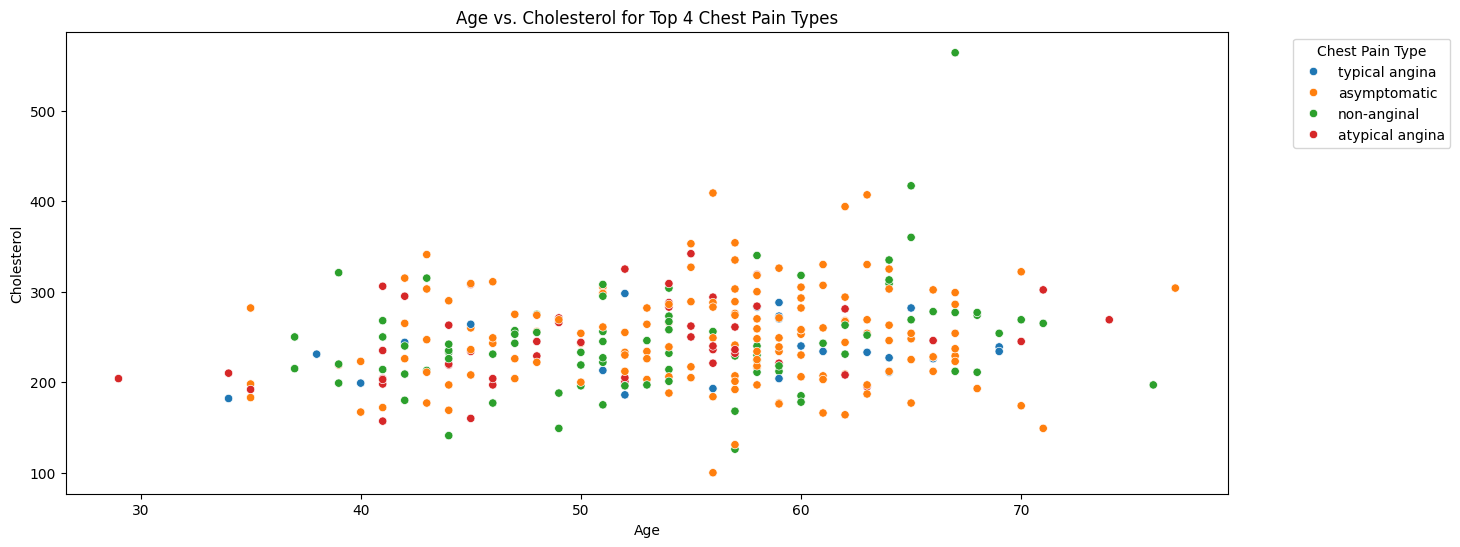

In [5]:
top_leagues = df['cp'].value_counts().nlargest(4).index  # Get the top 4 chest pain types
display(top_leagues)  # Display the top 4 chest pain types

# Plot the data
plt.figure(figsize=(15, 6))
sns.scatterplot(x='age', y='chol', data=df[df['cp'].isin(top_leagues)], hue='cp') 
plt.title('Age vs. Cholesterol for Top 4 Chest Pain Types')
plt.xlabel('Age') 
plt.ylabel('Cholesterol')
plt.legend(title='Chest Pain Type', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()


In [6]:
import plotly.express as px

fig = px.scatter(df, x='chol', y='age', color='sex') 
fig.update_layout(width=1000, height=500)
fig.update_layout(title_text='Scatter Plot of Cholesterol vs. Age (colored by Sex)')
fig.show()


In [7]:
from plotly.offline import iplot

fig = px.box(x = df["age"],
labels={"x":"Age"},
title="5-Number-Summary(Box Plot) of Age")
iplot(fig)

In [8]:
import plotly.express as px


fig = px.scatter(df, x='chol', y='age', color='cp', size = 'oldpeak', size_max = 30, hover_name = 'exang') 
fig.update_layout(width=1000, height=500)
fig.update_layout(title_text='Scatter Plot of Cholesterol vs. Age (colored by cp)')

In [9]:
fig = px.scatter(data_frame = df,
x="age",
y="chol", color="cp", size='ca',
hover_data=['oldpeak'])

fig.update_layout(title_text="<b> Cholesterol Vs Age <b>",
titlefont={'size': 24, 'family':'Serif'}, width=1000,
height=500,
)

fig.show()

In [10]:
fig = px.scatter( df,  x='chol',  y='age',  color='cp',  size='oldpeak',  size_max=30,  hover_name='exang',  facet_col='sex'  )
fig.update_layout(width=1000, height=500)
fig.update_layout(title_text='Scatter Plot of Cholesterol vs. Age (colored by cp)')
fig.show()


In [11]:
fig=px.bar(df,x='age',y='chol',hover_data=['oldpeak'],color='sex',height=400) 
fig.show()

In [12]:

def generate_rating_df(df):
    rating_df = df.groupby(['cp', 'slope']).agg({'id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['id'] != 0]  
    rating_df.columns = ['cp', 'slope', 'counts'] 
    rating_df = rating_df.sort_values('slope')  
    return rating_df

rating_df = generate_rating_df(df)

fig = px.bar(rating_df, x='cp', y='counts', color='slope')
fig.update_traces(textposition='auto', textfont_size=20)
fig.update_layout(barmode='stack', title="Counts of cp by Slope")
fig.show()


In [13]:
def generate_rating_df(df):
    rating_df = df.groupby(['cp', 'slope']).agg({'id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['id'] != 0]  
    rating_df.columns = ['cp', 'slope', 'counts']  
    rating_df = rating_df.sort_values('slope')  
    return rating_df

rating_df = generate_rating_df(df)

fig = px.bar(rating_df, x='cp', y='counts', color='slope')


fig.update_traces(textposition='auto', textfont_size=20)
fig.update_layout(barmode='group', title="Counts of cp by Slope")

fig.show() 


In [14]:
def generate_rating_df(df):
     rating_df = df.groupby(['cp', 'slope']).agg({'id': 'count'}).reset_index() 
     rating_df = rating_df[rating_df['id'] != 0]
     rating_df.columns = ['cp', 'slope', 'counts'] 
     rating_df = rating_df.sort_values('slope')
     return rating_df

rating_df = generate_rating_df(df)


fig = px.bar(rating_df, x='cp', y='counts', color='slope', barmode='group', text='counts',
)

fig.update_traces(textposition='auto',
textfont_size=20)

fig.show()

In [15]:

def generate_rating_df(df):
    rating_df = df.groupby(['cp', 'slope']).agg({'id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['id'] != 0]  
    rating_df.columns = ['cp', 'slope', 'counts']  
    rating_df = rating_df.sort_values('slope')  

    total_counts = rating_df['counts'].sum()
    rating_df['percentage'] = rating_df['counts'] / total_counts * 100  

    return rating_df  


rating_df = generate_rating_df(df)

fig = px.bar(rating_df, x='cp', y='counts', color='slope', text='percentage')

fig.update_traces(
    texttemplate='%{text:.1f}%', 
    textposition='outside',
    textfont_size=16
)
fig.update_layout(
    barmode='group',  
    yaxis_title='Count', 
    xaxis_title='CP', 
    legend_title='Slope',
    height=550, 
    width=1000,
    title_text="Distribution of Chest Pain Type by Percentage", 
    title_font_size=24
)
fig.show()

In [16]:
fig = px.scatter(data_frame = df,
x="age",
y="chol", color="cp", size='ca',
hover_data=['oldpeak'], marginal_x="histogram", marginal_y="box",)

fig.update_layout(title_text="<b> Age vs Cholesterol <b>",
titlefont={'size': 24, 'family':'Serif'}, width=1000,
height=550,
)

fig.show()

In [17]:
fig = px.scatter(data_frame = df,
x="age",
y="chol", color="thalch", size='ca', hover_data=['oldpeak'], marginal_x="histogram", marginal_y="box")

fig.update_layout(title_text="<b> Age vs Cholesterol <b>",
titlefont={'size': 24, 'family':'Serif'}, width=1000,
height=500,
)
fig.show()

In [18]:
fig = px.scatter(data_frame = df,x="age",y="chol", size ="ca", size_max=30, color= "sex",trendline="ols")
fig.update_layout(title_text="<b> Age vs Cholesterol <b>",titlefont={'size': 24, 'family':'Serif'}, width=1000,height=500,)
fig.show()

In [19]:
fig = px.scatter(data_frame = df,x="age",y="chol", size ="ca", size_max=30, color= "sex",trendline="ols", trendline_scope="overall", trendline_color_override="black")
fig.update_layout(title_text="<b>Chest Pain vs Gender<b>",titlefont={'size': 24, 'family':'Serif'}, width=1000,height=550,)
fig.show()

In [20]:
fig= px.histogram(df, x='age',height=500,width=900,template='simple_white', color='sex',color_discrete_sequence=['purple','pink'])


fig.update_layout(title={'text':'Histogram of Persons by Age','font':{'size':25}},title_font_family="Times New Roman", title_font_color="darkgrey",title_x=0.2) 
fig.update_layout(font_family='classic-roman',font_color= 'grey',yaxis_title={'text': " count", 'font': {'size':18}},
xaxis_title={'text': " Age", 'font': {'size':18}}
)
fig.show()

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

asymptomatic = df[df['cp'] == 'asymptomatic']
non_anginal = df[df['cp'] == 'non-anginal']
atypical_angina = df[df['cp'] == 'atypical angina']
typical_angina = df[df['cp'] == 'typical angina']

fig = make_subplots(rows=2,cols=2,specs=[[{'type': 'domain'}, {'type': 'domain'}], [{'type': 'domain'}, {'type': 'domain'}]],subplot_titles=("Asymptomatic", "Non-Anginal","Atypical Angina", "Typical Angina")
)

fig.add_trace(go.Pie(labels=asymptomatic["thal"], values=asymptomatic["chol"], name="Asymptomatic"), 1, 1)
fig.add_trace(go.Pie(labels=non_anginal["thal"], values=non_anginal["chol"], name="Non-Anginal"), 1, 2)
fig.add_trace(go.Pie(labels=atypical_angina["thal"], values=atypical_angina["chol"], name="Atypical Angina"), 2, 1)
fig.add_trace(go.Pie(labels=typical_angina["thal"], values=typical_angina["chol"], name="Typical Angina"), 2, 2)

fig.update_layout(height=800,width=1000, title_text="Distribution of Cholesterol Levels by Chest Pain Type",title_font_size=24
)

fig.update_traces(textposition='inside', textfont_size=16)

fig.update_annotations(font_size=20)

fig.show()


In [22]:
fig = px.scatter(df,  x='chol',  y='age',  color='cp',  size='oldpeak',  size_max=30,  hover_name='exang',  labels=dict(oldpeak='Oldpeak', chol='Cholesterol', age='Age'),   animation_frame='chol' 
)

fig.update_layout(width=1000, height=600, title_text='Scatter Plot of Cholesterol vs. Age (colored by cp) with Animation')

fig.show()

In [23]:
from plotly.offline import iplot

gender = df["sex"].value_counts() 
display(gender.head().to_frame())

fig = px.bar(data_frame=gender, x = gender.index,
y = gender, color=gender.index, text_auto="0.3s",
labels={"y": "Frequency", "index": "Gender"}

)
fig.update_traces(textfont_size=24)
iplot(fig)	

,count
sex,
Male,203
Female,96


In [24]:
from plotly.offline import iplot 
category = df["cp"].value_counts()
fig = px.bar(category,
x = category.index,
y = (category / sum(category)) * 100, color=category.index,
labels={"y" : "Frequency in (Percentage%)", "category":"Category"}, title="Frequency of Chest Pain Category in Percentage",
text = category.apply(lambda x: f'{(x / sum(category)) * 100:.1f}%'), template="plotly_dark"
)

fig.update_layout(showlegend=False) 
fig.update_traces(
textfont= {
"family": "consolas", "size": 20,
}
)
iplot(fig)

In [25]:
ChestPain = df["cp"].value_counts()
fig = px.pie(values=ChestPain, names = ChestPain.index, color_discrete_sequence= ["#98EECC", "#FFB6D9", "#99DBF5"], template="plotly_dark")

fig.update_traces(textposition='inside', textfont_size= 20, textinfo='percent+label') 
fig.update_layout(showlegend=True,width=1000, height=600)

iplot(fig)

In [26]:
cp = df["cp"].value_counts()
fig = px.bar(cp,
y = cp.index,
x = (cp / sum(cp)) * 100, color=cp.index,
labels={"x" : "Frequency in Percentage(%)", "cp":"Chest Pain"}, orientation="h",
title="Frequency of Chest Pain",
text = cp.apply(lambda x: f'{(x / sum(cp)) * 100:.1f}%'),
)
fig.update_layout(showlegend=True,width=1000, height=600) 
fig.update_traces(
textfont= {
"family": "consolas", "size": 20
}
)
iplot(fig)

In [27]:
import plotly.express as px


fig = px.pie(df.groupby('cp', as_index=False)['sex'].count().sort_values(by='sex', ascending=False).reset_index(drop=True),  names='cp',  values='sex',  color='cp', color_discrete_sequence=px.colors.sequential.Plasma_r, labels={'cp': 'Chest Pain', 'sex': 'Count'},  template='seaborn',  hole=0.4)

# Update layout
fig.update_layout(
    autosize=False, 
    width=1200, 
    height=700, 
    legend=dict(
        orientation='v', 
        yanchor='bottom', 
        y=0.40, 
        x=0.5
    ),
    title_text="Distribution of Chest Pain Types",
    title_font=dict(family="Arial", size=24)
)

fig.update_traces(
    textfont={
        "family": "Consolas", 
        "size": 20
    }
)
fig.show()


In [28]:
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(1,2,subplot_titles=('Age Distribution','Log Age Distribution')) 
fig.append_trace(go.Histogram(x=df['age'],
name='Age Distribution') ,1,1)

fig.append_trace(go.Histogram(x=np.log10(df['age']),
name='Log Age Distribution') ,1,2)

iplot(dict(data=fig))

In [29]:
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot

Q25 = np.quantile(df['chol'], q=0.25) 
Q75 = np.quantile(df['chol'], q=0.75)
IQR = Q75 - Q25
cut_off = IQR * 1.5

print('Number of Cholesterol Lower Outliers:', df[df['chol'] <= (Q25 - cut_off)]['chol'].count())
print('Number of Cholesterol Upper Outliers:', df[df['chol'] >= (Q75 + cut_off)]['chol'].count())

temp = df.groupby('cp').sum().sort_values('age', ascending=False)


data = [go.Bar(x=temp.index, y=temp['age'], name='Age', text=temp['age'], textposition='auto'), go.Bar(x=temp.index, y=temp['chol'], name='Cholesterol', text=temp['chol'], textposition='auto')
]

layout = go.Layout(
xaxis=dict(title='Chest Pain', titlefont=dict(size=25)), yaxis=dict(title='Values', titlefont=dict(size=25)), showlegend=True,
width=1300, height=600
)


fig = go.Figure(data=data, layout=layout)
iplot(fig)

Number of Cholesterol Lower Outliers: 1
Number of Cholesterol Upper Outliers: 5


In [30]:
print("data",df)

data       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina    145.00 233.00   True   
1      2   67    Male      Cleveland     asymptomatic    160.00 286.00  False   
2      3   67    Male      Cleveland     asymptomatic    120.00 229.00  False   
3      4   37    Male      Cleveland      non-anginal    130.00 250.00  False   
4      5   41  Female      Cleveland  atypical angina    130.00 204.00  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
299  300   68    Male      Cleveland     asymptomatic    144.00 193.00   True   
300  301   57    Male      Cleveland     asymptomatic    130.00 131.00  False   
301  302   57  Female      Cleveland  atypical angina    130.00 236.00  False   
508  509   47    Male        Hungary     asymptomatic    150.00 226.00  False   
748  749   56    Male  VA Long Beach     asymptomatic    120.00 100.00  False   

            restecg  t